## Loading the standard libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [38]:
data = pd.read_csv('Twitter_Sentiment_Data.csv', encoding = "ISO-8859-1", names = ['target', 'id', 'Date', 'flag', 'user', 'text'])
data.head()

,target,id,Date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [39]:
data.shape

(1600000, 6)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Missing Values

In [41]:
data.isnull().sum()

target    0
id        0
Date      0
flag      0
user      0
text      0
dtype: int64

## Check the target variable

<Axes: xlabel='target', ylabel='count'>

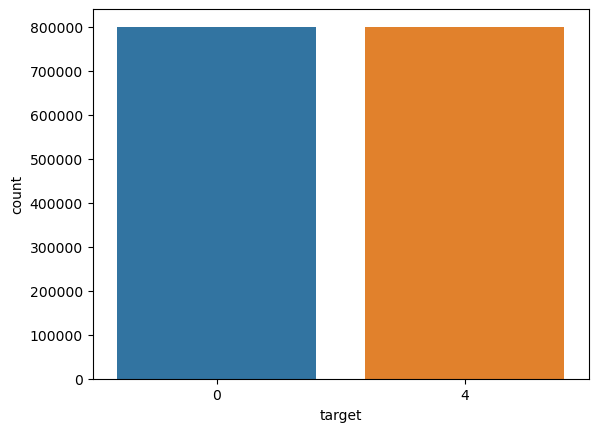

In [42]:
sns.countplot(x = 'target', data = data)

## Limit out analysis to only target and text column

In [43]:
df = data[['text', 'target']]
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [44]:
df['target'].unique()

array([0, 4], dtype=int64)

In [45]:
df['target'] = df['target'].replace(4, 1)
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [46]:
df['target'].unique()

array([0, 1], dtype=int64)

## Seperate all the postive tweets and negative tweets

In [47]:
df_pos = df[df['target'] == 1]
df_neg = df[df['target'] == 0]

In [48]:
df_pos.shape

(800000, 2)

In [49]:
df_neg.shape

(800000, 2)

In [50]:
800000/4

200000.0

## Taking one fourth of the data to execute on our machine smoothly

In [51]:
df_pos = df_pos.iloc[:int(200000.0)]
df_neg = df_neg.iloc[:int(200000.0)]

In [52]:
df_pos.shape

(200000, 2)

In [53]:
df_neg.shape

(200000, 2)

## Combine the pos tweets data and neg tweets data

In [56]:
dataset = pd.concat([df_pos, df_neg])
dataset.shape

(400000, 2)

In [55]:
dataset.shape

(400000, 2)

## NLP Tasks

1. Convert the text column to lower case

In [58]:
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [59]:
dataset['text'] = dataset['text'].str.lower()
dataset.head()

,text,target
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1


## Clean and remove all the stopwords from the text column

In [63]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
print(STOPWORDS)

{'than', 'above', 'being', 'the', 'was', 'll', 'before', 'does', 'too', 'ma', 'what', 'have', 'during', 'other', 's', 'myself', 'by', 'at', 'that', 'any', 'about', 'each', 'himself', 'did', 'themselves', 'thatll', 'him', 'through', 't', 'out', 'very', 'from', 'been', 'are', 'doing', 'her', 'i', 'ours', 'you', 'between', 'on', 'for', 'with', 'an', 'a', 'after', 'me', 'how', 'again', 'your', 'won', 'when', 'them', 'more', 'has', 'then', 'their', 'because', 'these', 'hers', 'it', 'will', 'who', 'ourselves', 'is', 'once', 'down', 'such', 'shouldve', 'theirs', 'yourself', 'under', 'herself', 'most', 'ain', 'she', 'youre', 'so', 'can', 'up', 're', 'where', 'yourselves', 'why', 'am', 'they', 'if', 'whom', 'here', 'his', 'both', 'which', 'should', 'those', 'itself', 'we', 'do', 'until', 'youve', 'in', 'having', 'into', 'now', 'this', 'had', 'all', 'my', 've', 'as', 'only', 'youd', 'own', 'he', 'our', 'and', 'youll', 'there', 'y', 'or', 'same', 'just', 'yours', 'shes', 'further', 'of', 'be', 'b

In [71]:
sent = 'i am learning NLP with Jupyter notebook'
sent

'i am learning NLP with Jupyter notebook'

In [73]:
def cleaninig_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])
cleaninig_stopwords(sent)

'learning NLP Jupyter notebook'

In [89]:
dataset['text'] = dataset['text'].apply(lambda text : cleaninig_stopwords(text))
dataset.tail()

,text,target
199995,doesn't feel good.,0
199996,work...,0
199997,@damienfranco common crash find delete process...,0
199998,baby boy wearing big boy underwear,0
199999,fml! forgot phone charger @home!,0


## Example

In [84]:

dic = {'Name':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 21, 19, 18]}
 
# Create DataFrame
d = pd.DataFrame(dic)
 
# Print the output.
print(d)

    Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18


- Multiply the Age column with 5

In [82]:
d['Age']=d['Age']*5
d

,Name,Age
0,Tom,100
1,nick,105
2,krish,95
3,jack,90


In [86]:
d['Name']=d['Name'].apply(lambda x : x * 2)
d

,Name,Age
0,TomTom,100
1,nicknick,105
2,krishkrish,95
3,jackjack,90


## Clean and remove punctuations

In [91]:
import string
eng_pun = string.punctuation
punc_list = eng_pun
punc_list

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [92]:
def remove_punctuations(text):
    translator = str.maketrans("","", punc_list)
    return text.translate(translator)

In [94]:
sent1 = "this is #punc, i am $cleaning &punc"
sent1

'this is #punc, i am $cleaning &punc'

In [95]:
remove_punctuations(sent1)

'this is punc i am cleaning punc'

In [97]:
dataset['text'] = dataset['text'].apply(lambda x : remove_punctuations(x))
dataset.tail()

,text,target
199995,doesnt feel good,0
199996,work,0
199997,damienfranco common crash find delete process ...,0
199998,baby boy wearing big boy underwear,0
199999,fml forgot phone charger home,0


## Cleaning and removing repeating characters

In [98]:
str1 = "How are are you"

str2 = "Edpresso is the the best platform to learn"

str3 = "Programming is fun fun"


In [99]:
regex = r'\b(\w+)(?:\W+\1\b)+' 

In [102]:
import re
re.sub(regex, r'\1', str1, flags=re.IGNORECASE)

'How are you'

In [105]:
def cleaning_dup_words(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x : cleaning_dup_words(x))
dataset.tail()

,text,target
199995,doesnt feel good,0
199996,work,0
199997,damienfranco common crash find delete process ...,0
199998,baby boy wearing big boy underwear,0
199999,fml forgot phone charger home,0


## Clean and Remove URLs

In [106]:
def remove_urls(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', '', text)
dataset['text'] = dataset['text'].apply(lambda x : remove_urls(x))
dataset

,text,target
800000,love health4uandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn2 effect everyone,1
...,...,...
199995,doesnt feel good,0
199996,work,0
199997,damienfranco common crash find delete process ...,0
199998,baby boy wearing big boy underwear,0


## Cleaning and Removing numbers

In [107]:
def remove_nums(text):
    return re.sub('[0-9]+', '', text)
dataset['text'] = dataset['text'].apply(lambda x : remove_nums(x))
dataset

,text,target
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1
...,...,...
199995,doesnt feel good,0
199996,work,0
199997,damienfranco common crash find delete process ...,0
199998,baby boy wearing big boy underwear,0


## Apply Stemming

In [110]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()

In [112]:
def stemming_on_text(data):
    text = [pst.stem(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x : stemming_on_text(x))
dataset

,text,target
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1
...,...,...
199995,doesnt feel good,0
199996,work,0
199997,damienfranco common crash find delete process ...,0
199998,baby boy wearing big boy underwear,0


## Apply Lemmatization

In [116]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [117]:
def lemmatizer_on_text(data):
    text = [wnl.lemmatize(word) for word in data]
    return data

dataset['text'] =dataset['text'].apply(lambda x : lemmatizer_on_text(x))
dataset

,text,target
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1
...,...,...
199995,doesnt feel good,0
199996,work,0
199997,damienfranco common crash find delete process ...,0
199998,baby boy wearing big boy underwear,0


## Wordcloud for negative tweets

In [119]:
!pip install wordcloud

Error processing line 3 of C:\Users\AMANT\anaconda3\lib\site-packages\googleapis_common_protos-1.56.4-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\AMANT\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


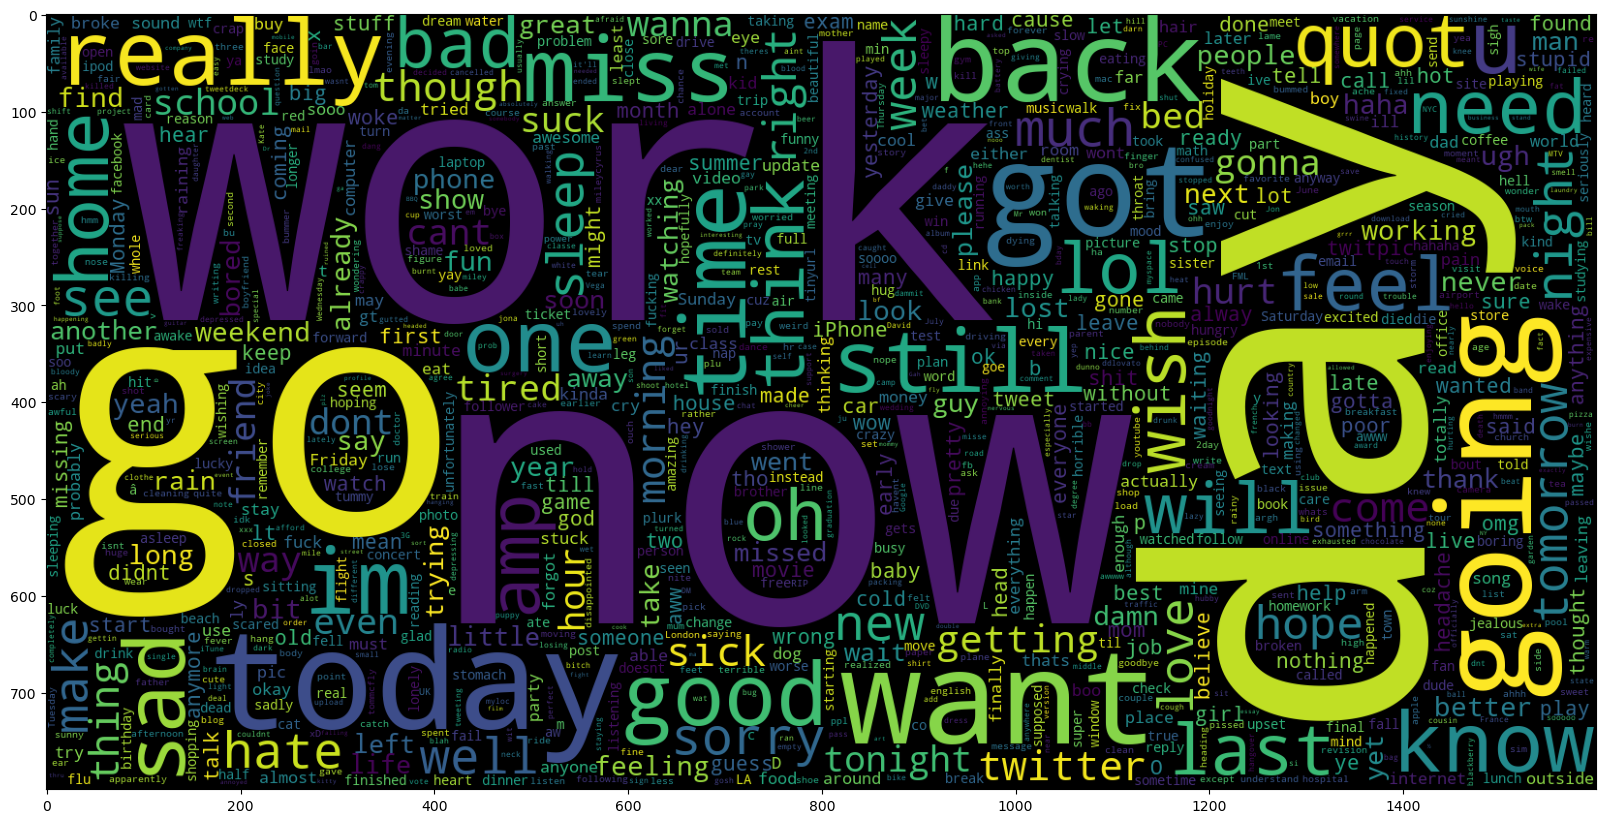

In [120]:
from wordcloud import WordCloud
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

## WordCloud for positive tweets

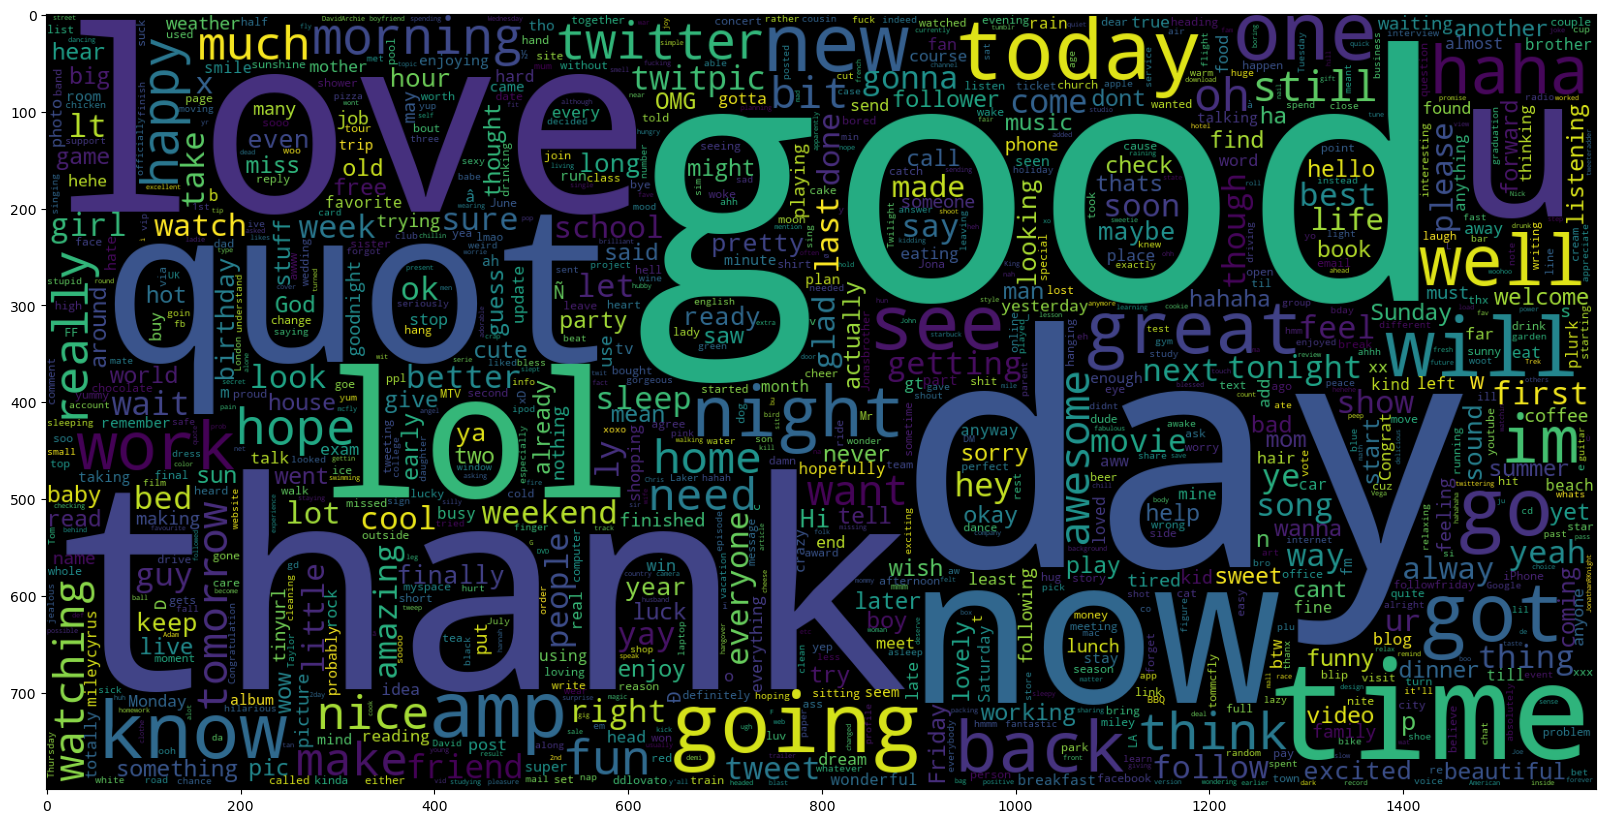

In [122]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## Seperate X and y

In [140]:
X = dataset[['text']]
y = dataset['target']

In [141]:
X.head()

,text
800000,love healthuandpets u guys r best
800001,im meeting one besties tonight cant wait girl...
800002,darealsunisakim thanks twitter add sunisa got ...
800003,sick really cheap hurts much eat real food plu...
800004,lovesbrooklyn effect everyone


## Split the data into train test split

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [143]:
X_train.head()

,text
42953,no one chat totally expected
56931,but dark side fringe looking ugly
926055,chrishsleeps think come msn
23550,foreversleeper no chance ah well guess shall ...
829460,no changed mind going bed ill deal shit tomorr...


## Apply Vectorization

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [149]:
tfidf.fit(X_train['text'])
len(tfidf.get_feature_names_out())

273842

In [150]:
X_train = tfidf.transform(X_train['text'])
X_test = tfidf.transform(X_test['text'])

## Apply Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [152]:
model.fit(X_train, y_train)

LogisticRegression()

In [154]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

## Perform Evaluation

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.78745

In [158]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [159]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [160]:
y_bnb_pred = bnb.predict(X_test)
y_bnb_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [161]:
accuracy_score(y_bnb_pred, y_test)

0.77455